<b>Building my Data Story</b><br>
Nora Keenan<br>
February 18, 2019

After reviewing the available fields and the quality of the support documentation, I've narrowed down the dataset to 24 features ranging from age, sex and education level to marital status and state.  For me, the first step in understanding how these features may interact with each other is to build a correlation matrix with all 24 features and look for any meaningful interaction.

In [1]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [26]:
#Build the dataframe
filepath = "C:\\Users\\nkeen\\Documents\\Capstone1\\Data\\Survey_results.xlsx"

excelfile = pd.read_excel(filepath)

keycols = excelfile[['psraid', 'sex', 'age', 'marital', 'par', 'educ2', 'emplnw', 'disa', 'party', 'ideo', 'race', 'inc']]
keycols1 = excelfile[['psraid', 'hh1', 'live1', 'reg', 'eminuse','intmob', 'home3nw', 'bbhome1', 'smart1', 'libusea', 'libuseb', 'lib_frq']]

totalcol = pd.merge(keycols, keycols1, how='inner', on='psraid')

totalcol = totalcol.replace("  ", 8)
totalcol = totalcol.replace(" ", 8)
totalcol = totalcol.drop('psraid', axis=1)
totalcol.columns

Index(['sex', 'age', 'marital', 'par', 'educ2', 'emplnw', 'disa', 'party',
       'ideo', 'race', 'inc', 'hh1', 'live1', 'reg', 'eminuse', 'intmob',
       'home3nw', 'bbhome1', 'smart1', 'libusea', 'libuseb', 'lib_frq'],
      dtype='object')

In [4]:
#Change numerical categorical values to text categorical values

totalcol['sex'] = totalcol['sex'].replace(1, "Male")
totalcol['sex'] = totalcol['sex'].replace(2, "Female")

totalcol['marital'] = totalcol['marital'].replace(1, "Married")
totalcol['marital'] = totalcol['marital'].replace(2, "Cohabitating")
totalcol['marital'] = totalcol['marital'].replace(3, "Divorced")
totalcol['marital'] = totalcol['marital'].replace(4, "Separated")
totalcol['marital'] = totalcol['marital'].replace(5, "Widowed")
totalcol['marital'] = totalcol['marital'].replace(6, "Never Married")
totalcol['marital'] = totalcol['marital'].replace(8, "Unknown")
totalcol['marital'] = totalcol['marital'].replace(9, "Refused")

totalcol['par'] = totalcol['par'].replace(1, "Yes")
totalcol['par'] = totalcol['par'].replace(2, "No")
totalcol['par'] = totalcol['par'].replace(8, "Unknown")
totalcol['par'] = totalcol['par'].replace(9, "Refused")

totalcol['educ2'] = totalcol['educ2'].replace(1, "No HS")
totalcol['educ2'] = totalcol['educ2'].replace(2, "Some HS")
totalcol['educ2'] = totalcol['educ2'].replace(3, "HS Grad")
totalcol['educ2'] = totalcol['educ2'].replace(4, "Some College")
totalcol['educ2'] = totalcol['educ2'].replace(5, "Assoc Degree")
totalcol['educ2'] = totalcol['educ2'].replace(6, "Bach Degree")
totalcol['educ2'] = totalcol['educ2'].replace(7, "Some Grad School")
totalcol['educ2'] = totalcol['educ2'].replace(8, "Grad School")
totalcol['educ2'] = totalcol['educ2'].replace(98, "Unknown")
totalcol['educ2'] = totalcol['educ2'].replace(99, "Refused")

totalcol['emplnw'] = totalcol['emplnw'].replace(1, "Full Time")
totalcol['emplnw'] = totalcol['emplnw'].replace(2, "Part Time")
totalcol['emplnw'] = totalcol['emplnw'].replace(3, "Retired")
totalcol['emplnw'] = totalcol['emplnw'].replace(4, "Unemployed")
totalcol['emplnw'] = totalcol['emplnw'].replace(5, "Self Employed")
totalcol['emplnw'] = totalcol['emplnw'].replace(6, "Disabled")
totalcol['emplnw'] = totalcol['emplnw'].replace(7, "Student")
totalcol['emplnw'] = totalcol['emplnw'].replace(8, "Other")
totalcol['emplnw'] = totalcol['emplnw'].replace(98, "Unknown")
totalcol['emplnw'] = totalcol['emplnw'].replace(99, "Refused")

totalcol['disa'] = totalcol['disa'].replace(1, "Yes")
totalcol['disa'] = totalcol['disa'].replace(2, "No")
totalcol['disa'] = totalcol['disa'].replace(8, "Unknown")
totalcol['disa'] = totalcol['disa'].replace(9, "Refused")

totalcol['party'] = totalcol['party'].replace(1, "Republican")
totalcol['party'] = totalcol['party'].replace(2, "Democrat")
totalcol['party'] = totalcol['party'].replace(3, "Independent")
totalcol['party'] = totalcol['party'].replace(4, "No Preference")
totalcol['party'] = totalcol['party'].replace(5, "Other")
totalcol['party'] = totalcol['party'].replace(8, "Unknown")
totalcol['party'] = totalcol['party'].replace(9, "Refused")

totalcol['ideo'] = totalcol['ideo'].replace(1, "Very Consrv")
totalcol['ideo'] = totalcol['ideo'].replace(2, "Consrv")
totalcol['ideo'] = totalcol['ideo'].replace(3, "Moderate")
totalcol['ideo'] = totalcol['ideo'].replace(4, "Liberal")
totalcol['ideo'] = totalcol['ideo'].replace(5, "Very Liberal")
totalcol['ideo'] = totalcol['ideo'].replace(8, "Unknown")
totalcol['ideo'] = totalcol['ideo'].replace(9, "Refused")

totalcol['race'] = totalcol['race'].replace(1,"White")
totalcol['race'] = totalcol['race'].replace(2,"Black")
totalcol['race'] = totalcol['race'].replace(3,"Asian")
totalcol['race'] = totalcol['race'].replace(4,"Other")
totalcol['race'] = totalcol['race'].replace(5,"Native American")
totalcol['race'] = totalcol['race'].replace(6,"Pac Islander")
totalcol['race'] = totalcol['race'].replace(7,"Hispanic")
totalcol['race'] = totalcol['race'].replace(8,"Unknown")
totalcol['race'] = totalcol['race'].replace(9,"Refused")

totalcol['inc'] = totalcol['inc'].replace(1, "<$10K")
totalcol['inc'] = totalcol['inc'].replace(2, "$10K-$20K")
totalcol['inc'] = totalcol['inc'].replace(3, "$20K-$30K")
totalcol['inc'] = totalcol['inc'].replace(4, "$30K-$40K")
totalcol['inc'] = totalcol['inc'].replace(5, "$40K-$50K")
totalcol['inc'] = totalcol['inc'].replace(6, "$50K-$75K")
totalcol['inc'] = totalcol['inc'].replace(7, "$75K-$100K")
totalcol['inc'] = totalcol['inc'].replace(8, "$100K-$150K")
totalcol['inc'] = totalcol['inc'].replace(98, "Unknown")
totalcol['inc'] = totalcol['inc'].replace(99, "Refused")
totalcol['inc'] = totalcol['inc'].replace(9, "$150K+")

totalcol['live1'] = totalcol['live1'].replace(1, "Large City")
totalcol['live1'] = totalcol['live1'].replace(2, "Suburb")
totalcol['live1'] = totalcol['live1'].replace(3, "Small City or Town")
totalcol['live1'] = totalcol['live1'].replace(4, "Rural")
totalcol['live1'] = totalcol['live1'].replace(8, "Unknown")
totalcol['live1'] = totalcol['live1'].replace(9, "Refused")

totalcol['reg'] = totalcol['reg'].replace(1, "Definitely")
totalcol['reg'] = totalcol['reg'].replace(2, "Probably")
totalcol['reg'] = totalcol['reg'].replace(3, "Not Registered")
totalcol['reg'] = totalcol['reg'].replace(8, "Unknown")
totalcol['reg'] = totalcol['reg'].replace(9, "Refused")

totalcol['eminuse'] = totalcol['eminuse'].replace(1, "Yes")
totalcol['eminuse'] = totalcol['eminuse'].replace(2, "No")
totalcol['eminuse'] = totalcol['eminuse'].replace(8, "Unknown")
totalcol['eminuse'] = totalcol['eminuse'].replace(9, "Refused")

totalcol['intmob'] = totalcol['intmob'].replace(1, "Yes")
totalcol['intmob'] = totalcol['intmob'].replace(2, "No")
totalcol['intmob'] = totalcol['intmob'].replace(3, "Unknown")
totalcol['intmob'] = totalcol['intmob'].replace(4, "Refused")

totalcol['home3nw'] = totalcol['home3nw'].replace(1, "Yes")
totalcol['home3nw'] = totalcol['home3nw'].replace(2, "No")
totalcol['home3nw'] = totalcol['home3nw'].replace(8, "Unknown")
totalcol['home3nw'] = totalcol['home3nw'].replace(9, "Refused")

totalcol['bbhome1'] = totalcol['bbhome1'].replace(1, "Dial-Up")
totalcol['bbhome1'] = totalcol['bbhome1'].replace(2, "Higher Speed")
totalcol['bbhome1'] = totalcol['bbhome1'].replace(3, "Both")
totalcol['bbhome1'] = totalcol['bbhome1'].replace(4, "Cell Phone Only")
totalcol['bbhome1'] = totalcol['bbhome1'].replace(5, "None")
totalcol['bbhome1'] = totalcol['bbhome1'].replace(8, "Unknown")
totalcol['bbhome1'] = totalcol['bbhome1'].replace(9, "Refused")

totalcol['smart1'] = totalcol['smart1'].replace(1, "Yes")
totalcol['smart1'] = totalcol['smart1'].replace(2, "No")
totalcol['smart1'] = totalcol['smart1'].replace(8, "Unknown")
totalcol['smart1'] = totalcol['smart1'].replace(9, "Refused")

totalcol['libusea'] = totalcol['libusea'].replace(1, "Yes, < 12 Mo.")
totalcol['libusea'] = totalcol['libusea'].replace(2, "Yes, > 12 Mo.")
totalcol['libusea'] = totalcol['libusea'].replace(3, "Never")
totalcol['libusea'] = totalcol['libusea'].replace(8, "Unknown")
totalcol['libusea'] = totalcol['libusea'].replace(9, "Refused")

totalcol['libuseb'] = totalcol['libuseb'].replace(1, "Yes, < 12 Mo.")
totalcol['libuseb'] = totalcol['libuseb'].replace(2, "Yes, > 12 Mo.")
totalcol['libuseb'] = totalcol['libuseb'].replace(3, "Never")
totalcol['libuseb'] = totalcol['libuseb'].replace(8, "Unknown")
totalcol['libuseb'] = totalcol['libuseb'].replace(9, "Refused")

totalcol['lib_frq'] = totalcol['lib_frq'].replace(1, "Weekly")
totalcol['lib_frq'] = totalcol['lib_frq'].replace(2, "Semi-Monthly")
totalcol['lib_frq'] = totalcol['lib_frq'].replace(3, "Monthly")
totalcol['lib_frq'] = totalcol['lib_frq'].replace(4, "Less Often")
totalcol['lib_frq'] = totalcol['lib_frq'].replace(8, "Unknown")
totalcol['lib_frq'] = totalcol['lib_frq'].replace(9, "Refused")

totalcol.head()

,sex,age,marital,par,educ2,emplnw,disa,party,ideo,race,...,live1,reg,eminuse,intmob,home3nw,bbhome1,smart1,libusea,libuseb,lib_frq
0,Male,30,Never Married,No,Some College,Part Time,Yes,Democrat,Very Liberal,Hispanic,...,Suburb,Definitely,Yes,Yes,Yes,Higher Speed,Yes,"Yes, > 12 Mo.",Never,Unknown
1,Female,77,Widowed,No,Bach Degree,Disabled,No,Democrat,Liberal,Hispanic,...,Large City,Definitely,No,No,Unknown,Unknown,Unknown,"Yes, > 12 Mo.",Never,Unknown
2,Male,45,Married,Yes,Bach Degree,Part Time,No,Republican,Liberal,Hispanic,...,Suburb,Definitely,Yes,Yes,Yes,Higher Speed,Yes,"Yes, > 12 Mo.",Never,Unknown
3,Male,23,Never Married,No,Bach Degree,Unemployed,No,Independent,Very Liberal,Hispanic,...,Large City,Definitely,Yes,No,Yes,Higher Speed,No,"Yes, < 12 Mo.","Yes, < 12 Mo.",Monthly
4,Male,25,Separated,No,Bach Degree,Part Time,No,Democrat,Liberal,Hispanic,...,Large City,Probably,Yes,Yes,Yes,Higher Speed,Yes,"Yes, < 12 Mo.","Yes, < 12 Mo.",Weekly


In [6]:
#Add column with a binary flag for whether or not the respondent has
#ever visited the library

def visited(c):
    if c['libusea'] == "Yes, < 12 Mo.":
        return 1
    elif c['libusea'] == "Yes, > 12 Mo.":
        return 1
    else:
        return 0

totalcol['has_visited'] = totalcol.apply(visited, axis=1)

<function matplotlib.pyplot.close(fig=None)>

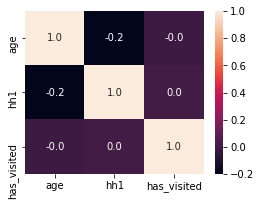

In [8]:
#Generate Correlation Heatmap

plt.figure(figsize = (4,3))
sns.heatmap(totalcol.corr(), annot=True, fmt=".1f")
plt.close


It appears that most correlations are between 0 and -.2, meaning not a lot of correlation.  

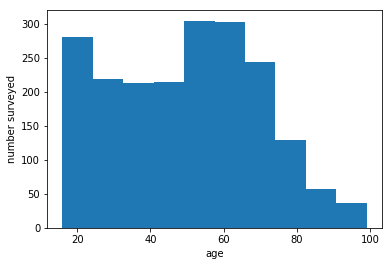

In [9]:
#Age Distribution

_ = totalcol['age'].plot(kind='hist')
_ = plt.xlabel('age')
_ = plt.ylabel('number surveyed')
plt.show()

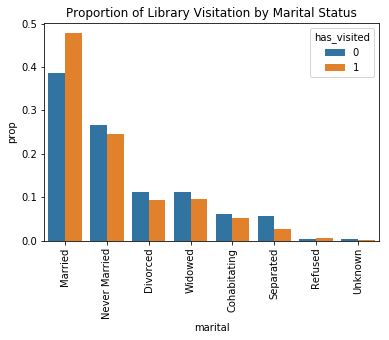

In [10]:
#Library Visitation by Marital Status

df = totalcol
x, y, hue = "marital", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Marital Status")
plt.show()

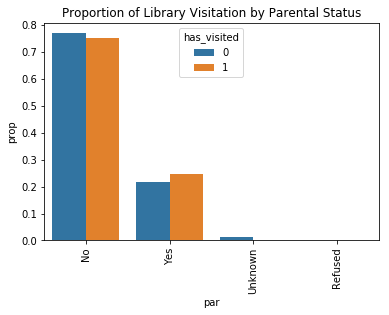

In [11]:
#Library Visitation by Parental Status

df = totalcol
x, y, hue = "par", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Parental Status")
plt.show()


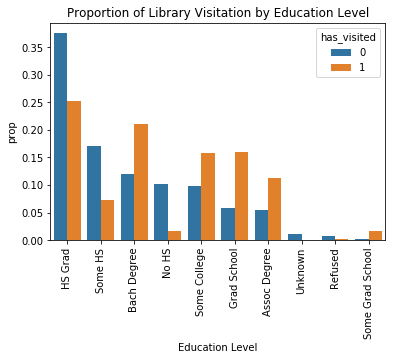

In [12]:
#Library Visitation by Education Level

df = totalcol
x, y, hue = "educ2", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Education Level")
_ = plt.title("Proportion of Library Visitation by Education Level")
plt.show()

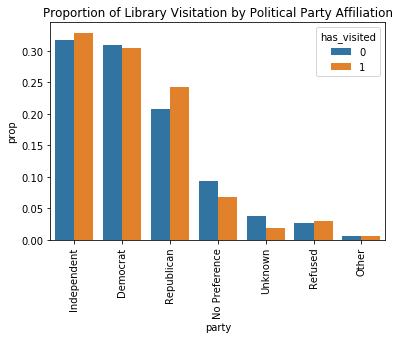

In [13]:
#Library Visitation by Political Party Affiliation

df = totalcol
x, y, hue = "party", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Political Party Affiliation")
plt.show()


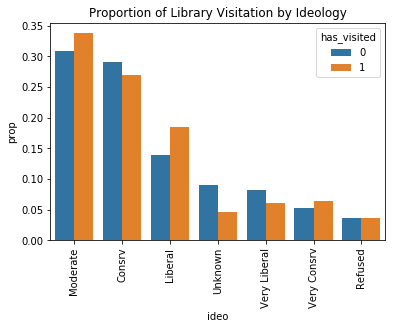

In [14]:
#Library Visitation by Ideology

df = totalcol
x, y, hue = "ideo", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Ideology")
plt.show()


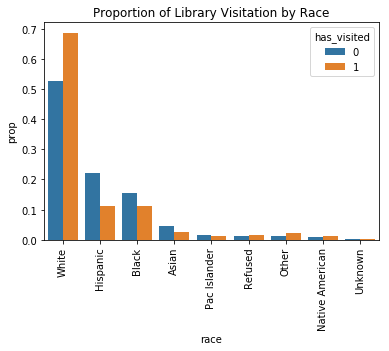

In [15]:
#Library Visitation by Race

df = totalcol
x, y, hue = "race", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Race")
plt.show()

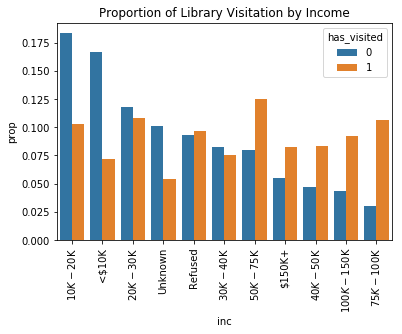

In [16]:
#Library Visitation by Income

df = totalcol
x, y, hue = "inc", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Income")
plt.show()


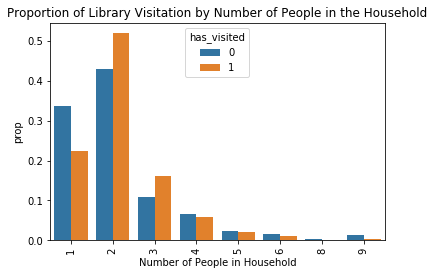

In [17]:
#Library Visitation by Number of People in the Household

df = totalcol
x, y, hue = "hh1", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Number of People in the Household")
_ = plt.xlabel("Number of People in Household")
plt.show()

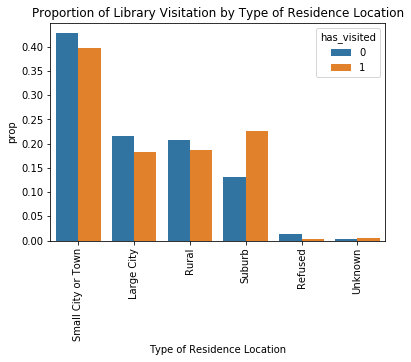

In [18]:
#Library Visitation by Type of Residence Location

df = totalcol
x, y, hue = "live1", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Type of Residence Location")
_ = plt.xlabel("Type of Residence Location")
plt.show()

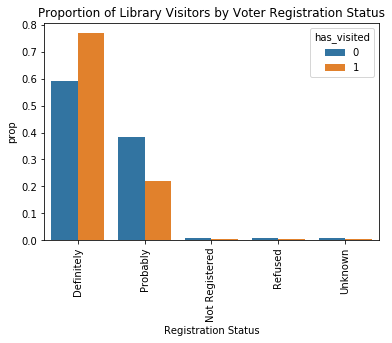

In [19]:
#Library Visitation by Voter Registration

df = totalcol
x, y, hue = "reg", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitors by Voter Registration Status")
_ = plt.xlabel("Registration Status")
plt.show()

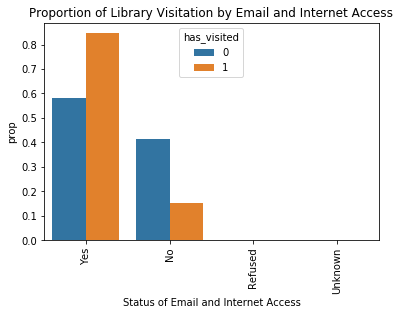

In [21]:
#Library Visitation by Email and Internet Access

df = totalcol
x, y, hue = "eminuse", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Email and Internet Access")
_ = plt.xlabel("Status of Email and Internet Access")
plt.show()

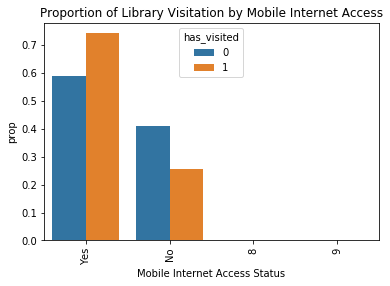

In [22]:
#Library Visitation by Mobile Internet Access

df = totalcol
x, y, hue = "intmob", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Mobile Internet Access")
_ = plt.xlabel("Mobile Internet Access Status")
plt.show()

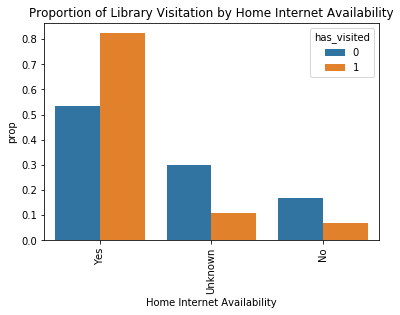

In [23]:
#Library Visitation by Internet Access at Home

df = totalcol
x, y, hue = "home3nw", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Home Internet Availability")
_ = plt.xlabel("Home Internet Availability")
plt.show()

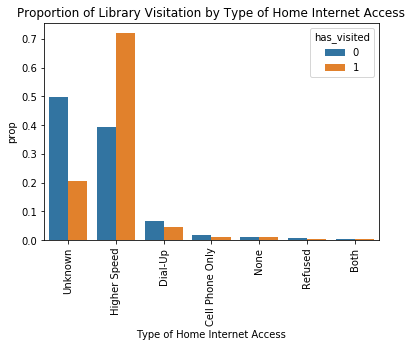

In [24]:
#Library Visitation by Type of Home Internet Access

df = totalcol
x, y, hue = "bbhome1", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Type of Home Internet Access")
_ = plt.xlabel("Type of Home Internet Access")
plt.show()

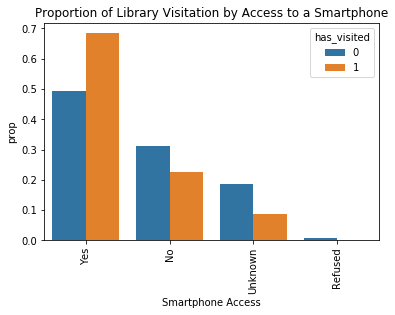

In [25]:
#Library Visitation by Access to a Smartphone

df = totalcol
x, y, hue = "smart1", "prop", "has_visited"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.xticks(rotation=90)
_ = plt.title("Proportion of Library Visitation by Access to a Smartphone")
_ = plt.xlabel("Smartphone Access")
plt.show()

<h3>Inferences</h3>

In the analyses above I used a heatmap, bar chart and histogram to gain insights from the data.  It appears that <u>income and education level</u> distributions are different for people that visit the library compared to those that don't.  Also, <u>Democrats and Independents use the library more than Republicans</u>. <u>Broadband availability at home does not appear to be a motivating factor for library usage</u>.  I would expect to see lower broadband avaiability at home for those that visit the library if in fact the library was a main point of access for them.

<h4>Follow up statistics</h4>
In the inferential statistics section I would like to test if income and education levels are statistically different between visitors and non-visitors.  